<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Parcial3/Boson_de_higgs_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install emcee
!pip install corner

In [112]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [113]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datos/")
!ls

datos.csv	    Exponencial.dat  Higgs.txt	      MediaMovilData.csv     MinimosLineal.txt
DatosRegresion.csv  Gaussiano.csv    Matematicas.txt  MinimosCuadratico.txt


In [114]:
file = '/content/drive/MyDrive/Colab Notebooks/Datos/Higgs.txt'
file

'/content/drive/MyDrive/Colab Notebooks/Datos/Higgs.txt'

In [115]:
data = pd.read_csv(file,sep=',')
datos=np.array(data['Higgs'])
datos

array([110.78833312, 104.85217   , 104.3060318 , ..., 123.05224637,
       125.46722845, 124.84467973])

In [116]:
new=np.histogram(datos, bins=30, density=True)
new

(array([0.04325532, 0.0401338 , 0.03790414, 0.03455966, 0.02876256,
        0.02251952, 0.02363435, 0.02697883, 0.02274249, 0.01739131,
        0.02118173, 0.02853959, 0.02920849, 0.02987738, 0.01560759,
        0.01025642, 0.00914159, 0.00914159, 0.0057971 , 0.00557414,
        0.0071349 , 0.006466  , 0.00401338, 0.006466  , 0.00289855,
        0.00423635, 0.00222966, 0.00200669, 0.00156076, 0.00245262]),
 array([100.00055098, 101.99388333, 103.98721568, 105.98054803,
        107.97388038, 109.96721273, 111.96054509, 113.95387744,
        115.94720979, 117.94054214, 119.93387449, 121.92720685,
        123.9205392 , 125.91387155, 127.9072039 , 129.90053625,
        131.89386861, 133.88720096, 135.88053331, 137.87386566,
        139.86719801, 141.86053037, 143.85386272, 145.84719507,
        147.84052742, 149.83385977, 151.82719213, 153.82052448,
        155.81385683, 157.80718918, 159.80052153]))

In [117]:
frec=np.histogram(datos, bins=30)
frec

(array([194, 180, 170, 155, 129, 101, 106, 121, 102,  78,  95, 128, 131,
        134,  70,  46,  41,  41,  26,  25,  32,  29,  18,  29,  13,  19,
         10,   9,   7,  11]),
 array([100.00055098, 101.99388333, 103.98721568, 105.98054803,
        107.97388038, 109.96721273, 111.96054509, 113.95387744,
        115.94720979, 117.94054214, 119.93387449, 121.92720685,
        123.9205392 , 125.91387155, 127.9072039 , 129.90053625,
        131.89386861, 133.88720096, 135.88053331, 137.87386566,
        139.86719801, 141.86053037, 143.85386272, 145.84719507,
        147.84052742, 149.83385977, 151.82719213, 153.82052448,
        155.81385683, 157.80718918, 159.80052153]))

In [118]:
bien=[]
for i in range(len(new[1])):
  if i<len(new[1])-1:
    prom=(new[1][i]+(new[1][i+1]))/2
    bien.append(prom)
bien=np.array(bien)
bien

array([100.99721715, 102.9905495 , 104.98388186, 106.97721421,
       108.97054656, 110.96387891, 112.95721126, 114.95054361,
       116.94387597, 118.93720832, 120.93054067, 122.92387302,
       124.91720537, 126.91053773, 128.90387008, 130.89720243,
       132.89053478, 134.88386713, 136.87719949, 138.87053184,
       140.86386419, 142.85719654, 144.85052889, 146.84386125,
       148.8371936 , 150.83052595, 152.8238583 , 154.81719065,
       156.810523  , 158.80385536])

<ErrorbarContainer object of 3 artists>

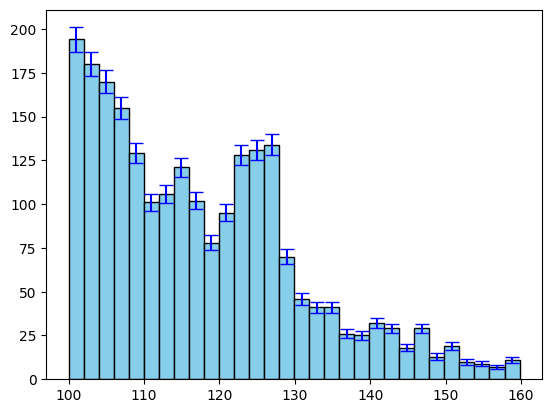

In [119]:
plt.hist(datos, bins=30, ec="k", color="skyblue")
x=np.linspace(np.min(bien),np.max(bien),len(bien))
plt.errorbar(x,frec[0], yerr=0.5*np.sqrt(frec[0]), fmt="none", ecolor="blue", capsize=5)

In [120]:
def like (a,x):
  return (1/a)*(np.exp(-(x-100)/a))

In [121]:
def jointlike (a,x):
  return np.sum(-np.log(like(a,x)))

In [122]:
import scipy.optimize as opt
r=10
R=opt.minimize(jointlike,r,args=(datos), bounds = ( (0,50), )).x
R

array([17.61888054])

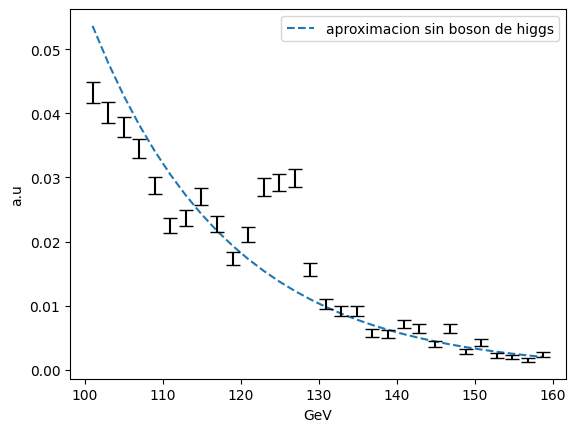

In [123]:
plt.plot(x, like(R,x), linestyle="--", label="aproximacion sin boson de higgs")
#plt.hist(datos, bins=30, ec="k", color="skyblue", density=True)
plt.errorbar(bien,new[0], yerr=0.5*np.sqrt(new[0]/np.sum(bien)), fmt="none", ecolor="k", capsize=5)
plt.xlabel("GeV")
plt.ylabel("a.u")
plt.legend()
plt.show()

In [124]:
def like2 (A, mu, sigma, a, x):
  return A*(1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-(x-mu)**2/(2*sigma**2))+ (1-A)*(1/a)*(np.exp(-(x-100)/a))

In [125]:
def jointlike2(params, x):
  A, mu, sigma, a = params
  return np.sum(-np.log(like2(A, mu, sigma, a, x)))

In [126]:
r2=np.array([1,100.,60.,R[0]])
R2 = opt.minimize(jointlike2, r2, args=(datos), bounds=((0, 1), (50, 500), (1, 100), (1, 100))).x
R2

array([  0.        , 111.01198686,  27.58088214,  17.61888054])

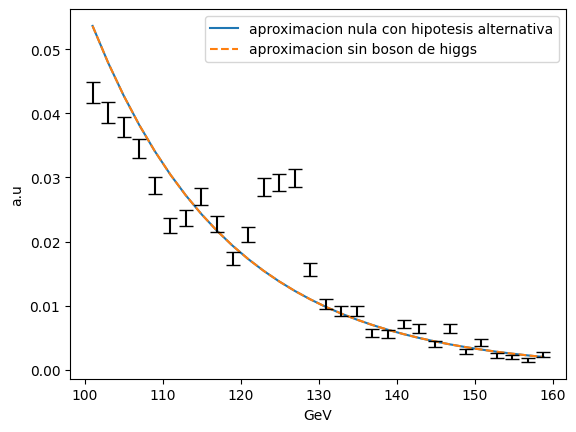

In [127]:
plt.plot(x, like2(*R2,x), label="aproximacion nula con hipotesis alternativa")
plt.plot(x, like(R,x), linestyle="--", label="aproximacion sin boson de higgs")
#plt.hist(datos, bins=30, ec="k", color="skyblue", density=True)
plt.errorbar(bien,new[0], yerr=0.5*np.sqrt(new[0]/np.sum(bien)), fmt="none", ecolor="k", capsize=5)
plt.xlabel("GeV")
plt.ylabel("a.u")
plt.legend()
plt.show()

In [128]:
def higgs (x,p):
  A,mu,sigma,a =p
  return A*(1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-(x-mu)**2/(2*sigma**2))+ (1-A)*(1/a)*(np.exp(-(x-100)/a))

In [129]:
def Chi2(p,x,y,sigma,Model):
  return np.sum(((y-Model(x,p))/sigma)**2)

In [130]:
nll = lambda *p: Chi2(*p)

In [131]:
def higgs(x, *p):
  A, mu, sigma, a = p
  return A * (1 / (np.sqrt(2 * np.pi * (sigma**2)))) * np.exp(-(x - mu)**2 / (2 * sigma**2)) + (1 - A) * (1 / a) * (np.exp(-(x - 100) / a))

def Chi2(p, x, y, sigma, Model):
  return np.sum(((y - Model(x, *p)) / sigma)**2)

nll = lambda *p: Chi2(*p)

base = np.array([0.1, 120., 5., 20.])

result = opt.minimize(nll, base, args=(bien, new[0], 0.5 * np.sqrt(new[0] / np.sum(bien)), higgs), options={"disp": True})
NU=result.x
NU

Optimization terminated successfully.
         Current function value: 112.223619
         Iterations: 18
         Function evaluations: 130
         Gradient evaluations: 26


array([1.20191703e-01, 1.25122418e+02, 2.55800767e+00, 1.88665740e+01])

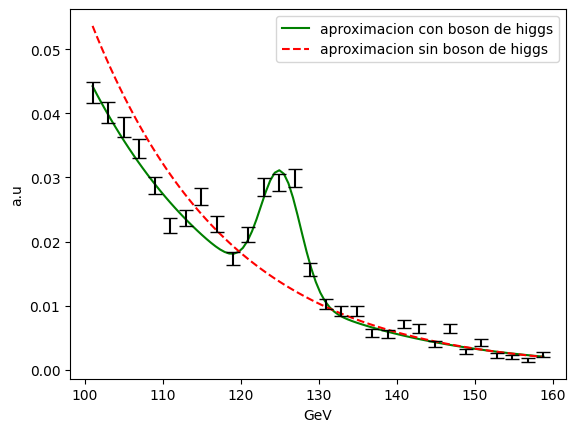

In [132]:
X=np.linspace(np.min(bien),np.max(bien),100)
plt.plot(X, like2(*NU,X), label="aproximacion con boson de higgs", color="green")
plt.plot(X, like2(*R2,X), linestyle="--", label="aproximacion sin boson de higgs", color="red")
plt.errorbar(bien,new[0], yerr=0.5*np.sqrt(new[0]/np.sum(bien)), fmt="none", ecolor="k", capsize=5)
plt.xlabel("GeV")
plt.ylabel("a.u")
plt.legend()
plt.show()

In [133]:
print("Los valores de las variables son las siguientes:")
print("A =",NU[0])
print("mu =",NU[1])
print("sigma =",NU[2])
print("a =",NU[3])

Los valores de las variables son las siguientes:
A = 0.12019170268779794
mu = 125.12241842426053
sigma = 2.5580076736901836
a = 18.86657396424691


In [134]:
def desviaciones(Nu):
  resultado=np.sqrt(2*(np.log(jointlike2(Nu,datos)/like2(*Nu, datos))))
  return resultado

In [135]:
desviaciones(NU).mean()

5.074933384963759

In [136]:
#Las desviaciones superan 5 sigmas por lo que podemos afirmar haber descubierto el boson de higgs!!!

In [137]:
h=6.62e-34
hj=h*6.242e9
TiempoDeVida=hj/NU[3]
TiempoDeVida

2.190224896067898e-25

In [138]:
def logPrior(p):
  A,mu,sigma,alpha=p
  if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
    return 0.0
  else:
    return -np.inf

In [139]:
def Likelihood (p,x):
  return like2(*p,x)

In [140]:
def jointlike3(p,x):
  A, mu, sigma, a = p
  return np.sum(np.log(Likelihood(p, x)))

In [141]:
def logPosterior (p,x):
  logP=logPrior(p)
  if np.isinf(logP):
    return -np.inf
  else:
    return logP+jointlike3(p,x)

In [142]:
n_walkers, n_parameters= 100, 4
p0=np.zeros((n_walkers,n_parameters))
p0[:,0]=0.3
p0[:,1]=NU[1]
p0[:,2]=NU[2]
p0[:,3]=NU[3]
p0+=np.random.randn(n_walkers,n_parameters)
p0

array([[-7.76903091e-01,  1.27074264e+02,  2.99885254e+00,
         1.97297585e+01],
       [-4.79172279e-01,  1.26337822e+02,  1.05774341e+00,
         1.70062856e+01],
       [ 2.69041244e+00,  1.27012548e+02,  8.45001625e-01,
         1.77740460e+01],
       [-8.55442780e-01,  1.24467674e+02,  2.74531322e+00,
         2.09400696e+01],
       [ 5.24380302e-01,  1.25934843e+02,  2.18121598e+00,
         1.91840826e+01],
       [-2.37975115e-01,  1.25126829e+02,  2.94007751e+00,
         1.78822743e+01],
       [ 1.04771321e+00,  1.24742703e+02,  4.44493002e-01,
         1.90855317e+01],
       [ 1.76700436e+00,  1.24795012e+02,  2.33541043e+00,
         1.96761159e+01],
       [-6.30475543e-01,  1.24346068e+02,  2.36195974e+00,
         1.65328296e+01],
       [ 9.58287338e-01,  1.25647245e+02,  4.09163940e+00,
         1.94599994e+01],
       [ 2.03181472e+00,  1.24997884e+02,  4.64441064e+00,
         1.83295823e+01],
       [ 2.18789249e+00,  1.25062639e+02,  2.50926454e+00,
      

In [143]:
nuevosd=np.array(data['Higgs'])

In [144]:
sampler=emcee.EnsembleSampler(n_walkers,n_parameters,logPosterior,args=(nuevosd,))
pos, prob, state=sampler.run_mcmc(p0,1000,progress=True)

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:27<00:00, 36.07it/s]


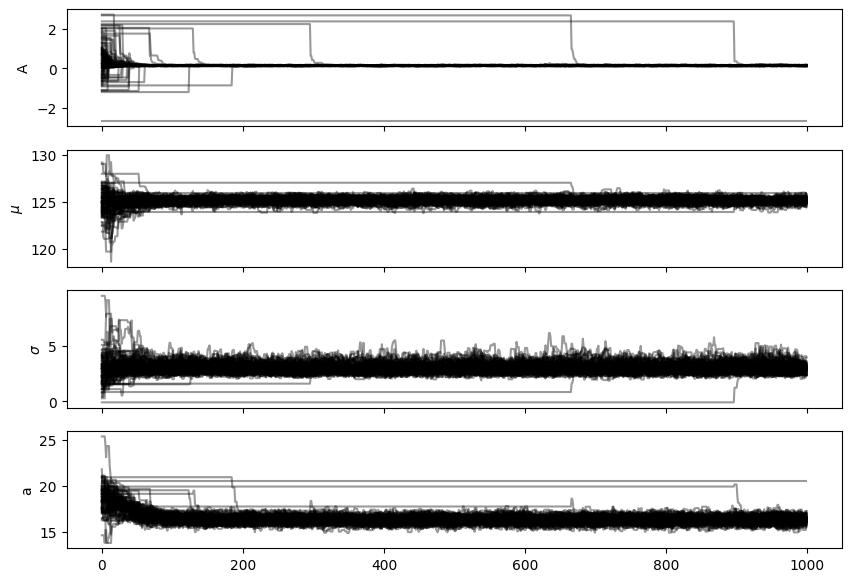

In [145]:
fig, axes=plt.subplots(4, figsize=(10,7), sharex=True)
labels=["A",'$\mu$','$\sigma$',"a"]
for i in range(4):
  axes[i].plot(sampler.chain[:,:,i].T,'k',alpha=0.4)
  axes[i].set_ylabel(labels[i])

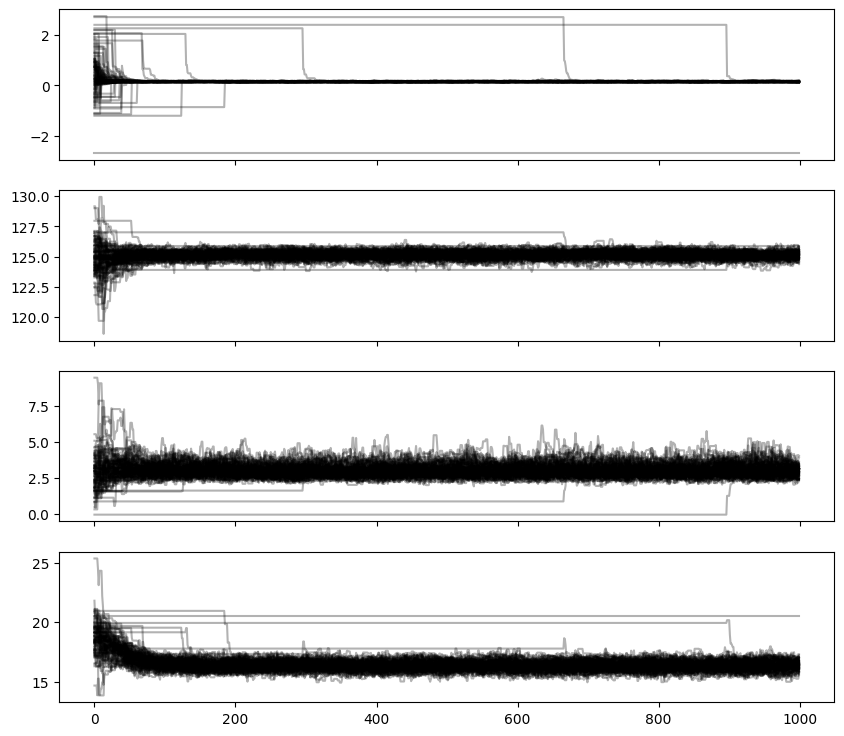

In [146]:
fig, axes = plt.subplots(4, figsize=(10,9), sharex=True)

samples = sampler.get_chain()
for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)

In [147]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths

array([  0.1465962 , 125.16840758,   2.93033038,  16.35770486])

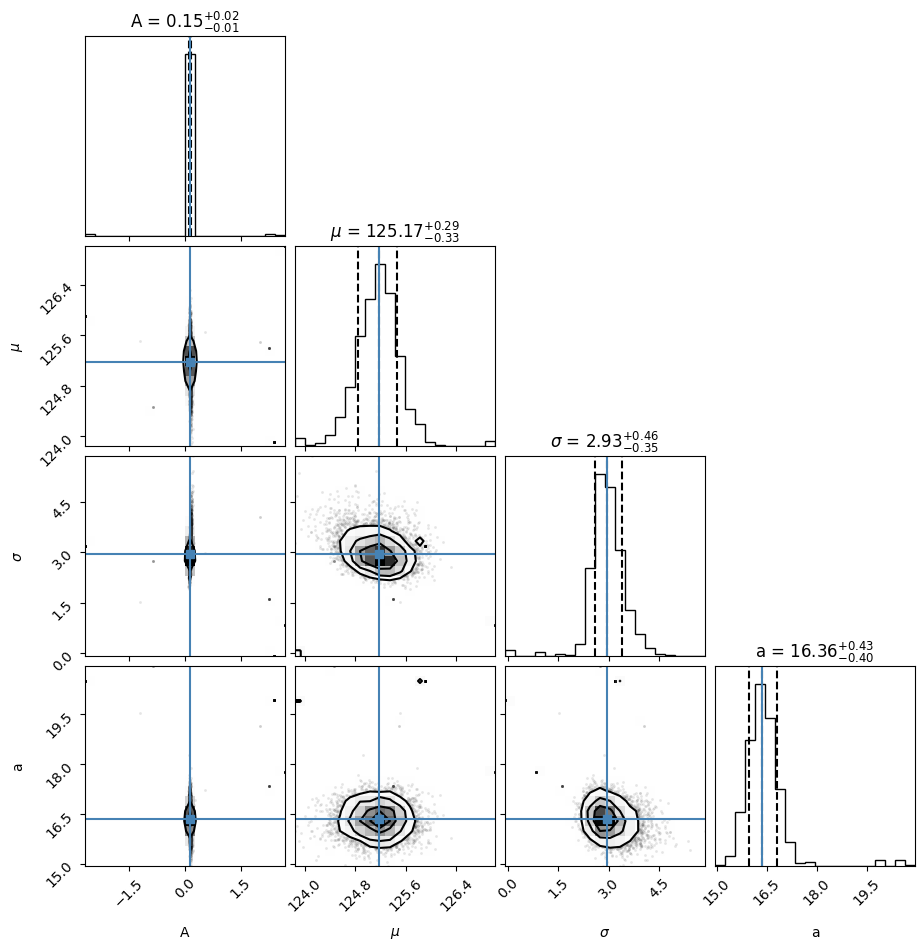

In [148]:
figure = corner.corner(flat_samples, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)

In [150]:
#Es evidente que hay un problema con la variable A (ya que el eje no se hace zoom debido a la apricion de datos fuera de la media), pero el valor y su desface esta bien.
# podemos ver que el mu esta muy bien,
#Por esto, el error porsentual de la masa (mu) de la particula seria
deltam=0.33*100/125.16
print("El error porcentual de la masa de la particula es de",deltam,"%")

El error porcentual de la masa de la particula es de 0.2636625119846596 %
